In [1]:
import numpy as np
import random as rand
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [2]:
np.random.seed(0)

In [3]:
df = pd.read_csv('q4.data', sep='\t')

In [4]:
np.unique(df["population"])

array(['AFR', 'AMR', 'ASN', 'EUR'], dtype=object)

In [5]:
american_count = df[df['population'] == 'ASN'].shape[0]

# Print the result
print(f'Total number of Americans: {american_count}')

Total number of Americans: 286


In [6]:
snps = df.iloc[:, 2:] 
#379 EURO
#286 ASN
#246 AFR
#181 AMR


In [7]:
true_population = df.values[:,1]

In [8]:
true_population

array(['EUR', 'EUR', 'EUR', ..., 'EUR', 'EUR', 'EUR'], dtype=object)

In [9]:
# PCA 4a
pca = PCA(n_components = 2,random_state = 0)
res = pca.fit_transform(snps)

df_pca = pd.DataFrame(data = res, columns = ['PC1','PC2'])

df_pca["Population"] = true_population

In [10]:
df_pca

,PC1,PC2,Population
0,-5.751851,-14.713385,EUR
1,-4.013637,-13.973450,EUR
2,-3.703170,-14.826890,EUR
3,-5.181065,-15.867870,EUR
4,-5.212858,-15.475934,EUR
...,...,...,...
1087,-4.553362,-14.854280,EUR
1088,-5.418290,-14.700398,EUR
1089,-5.432639,-14.801245,EUR
1090,-4.799984,-15.587770,EUR


In [11]:
c_palette = sns.color_palette("pastel", n_colors = len(df_pca['Population'].unique()))

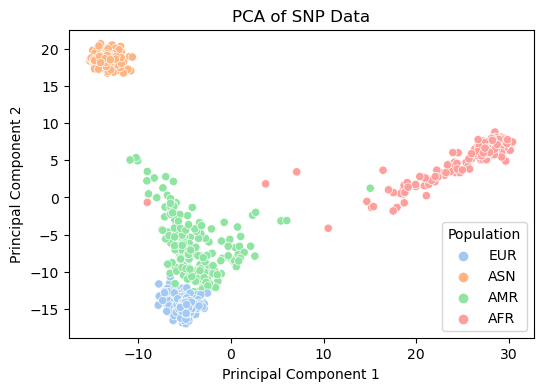

In [12]:
plt.figure(figsize=(6,4))
scatter = sns.scatterplot(x='PC1', y='PC2', hue= 'Population', data = df_pca, palette = c_palette)
plt.title('PCA of SNP Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [13]:
#KMEANS
kmeans = KMeans(n_clusters=4, n_init=5,random_state = 0)
res_k_means = kmeans.fit_predict(snps)

cluster_labels = ["Cluster1","Cluster2","Cluster3","Cluster4"]

df["Cluster"] = res_k_means
cluster_size_order = df["Cluster"].value_counts().sort_values(ascending=False).index
cluster_map = {cluster: cluster_labels[i] for i, cluster in enumerate(cluster_size_order)}

df["Cluster"] = df["Cluster"].map(cluster_map)

C:\Users\yaman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


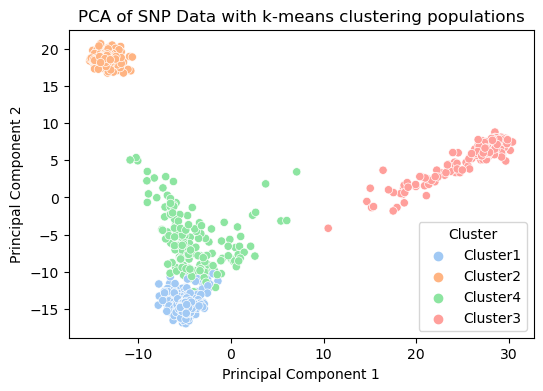

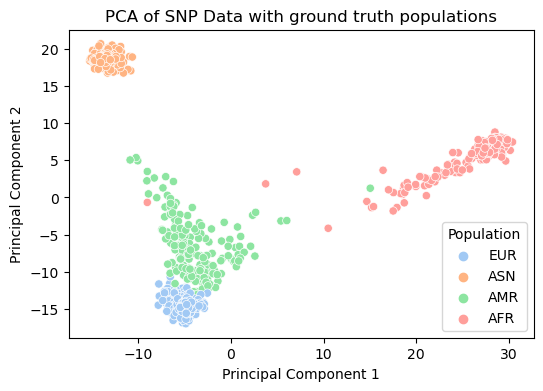

In [14]:
df['PC1'] = res[:,0]
df['PC2'] = res[:,1]

plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette=c_palette)
plt.title('PCA of SNP Data with k-means clustering populations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.figure(figsize=(6,4))
scatter = sns.scatterplot(x='PC1', y='PC2', hue= 'Population', data = df_pca, palette = c_palette)
plt.title('PCA of SNP Data with ground truth populations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [15]:
cluster_map2 = {"Cluster1": 'EUR', "Cluster2": 'ASN', "Cluster3": 'AFR', "Cluster4": 'AMR'}
df['Cluster'] = df['Cluster'].map(cluster_map2)

In [16]:
# Correctly assigned individuals

correct = (df['Cluster'] == df['population']).sum()
n = len(df)
acc = correct/n

print(acc * 100)

97.16117216117216
